In [1]:
import os
import sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
INPUT_DIR = "../inputs"
train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(INPUT_DIR, "test.csv"))
# sample_submit.csvにはカラム名がないのでnames=("id","target")でカラム名をつくってやる
submit_df = pd.read_csv(os.path.join(INPUT_DIR, "sample_submit.csv"),names=("id","target"))

In [3]:
# カラム名が日本語なのは不都合なので英語に変換する
train_df = train_df.rename(
    columns={
        '賃料':'target',
        '契約期間':'Contract', 
        '間取り':'Room', 
        '築年数':'Passed',
        '駐車場':'Parking', 
        '室内設備':'Facility', 
        '放送・通信':'Internet', 
        '周辺環境':'Building', 
        '建物構造':'Material', 
        '面積':'Area', 
        'キッチン':'Kitchen', 
        '所在地':'Place',
        'バス・トイレ':'Bath', 
        '所在階':'Floor', 
        'アクセス':'Access', 
        '方角':'Angle'
    }
)

test_df = test_df.rename(
    columns={
        '契約期間':'Contract', 
        '間取り':'Room', 
        '築年数':'Passed',
        '駐車場':'Parking', 
        '室内設備':'Facility', 
        '放送・通信':'Internet', 
        '周辺環境':'Building', 
        '建物構造':'Material', 
        '面積':'Area', 
        'キッチン':'Kitchen', 
        '所在地':'Place',
        'バス・トイレ':'Bath', 
        '所在階':'Floor', 
        'アクセス':'Access', 
        '方角':'Angle'
    }
)
display(train_df.head(1))

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間


In [4]:
train_df["Access"]

0        都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1        都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2        京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3        総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...
4        京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...
                               ...                        
31465    都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...
31466    東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...
31467    東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...
31468    中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...
31469    有楽町線\t千川駅\t徒歩5分\t\t有楽町線\t要町駅\t徒歩13分\t\t西武池袋線\t...
Name: Access, Length: 31470, dtype: object

### Accessを使った特徴量をつくる
- 最寄駅からの時間

In [5]:
#access = train_df["Access"].apply(
#    lambda x: [int(s.replace("徒歩","").replace("分","")) for s in x.split("\t") if "徒歩"==s[:2]])

def extract_minute(x):
    ans = [int(s.replace("徒歩","").replace("分","")) for s in x.split("\t") if "徒歩"==s[:2]]
    try:
        ans = min(ans)
    except:
        ans = np.nan
    return ans
access = pd.DataFrame(train_df["Access"].apply(extract_minute)).rename(columns={"Access":"nearest_time"})
access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nearest_time  31327 non-null  float64
dtypes: float64(1)
memory usage: 246.0 KB


In [6]:
access

,nearest_time
0,4.0
1,5.0
2,6.0
3,3.0
4,5.0
...,...
31465,7.0
31466,4.0
31467,5.0
31468,4.0


In [7]:
train_df = pd.concat([train_df, access],axis=1)

In [8]:
train_df

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract,nearest_time
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間,4.0
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間,5.0
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間,6.0
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。,3.0
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,31466,80000,東京都板橋区蓮根２丁目,都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...,2DK,30年0ヶ月,南,37.9m2,1階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ2口／\t給湯,インターネット対応,エアコン付\tバルコニー／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,鉄骨造,2年間,7.0
31466,31467,54500,東京都世田谷区太子堂５丁目17-1,東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...,1R,39年7ヶ月,西,12.04m2,4階／4階建,専用バス／\t専用トイレ／\tシャワー,ガスコンロ／\tコンロ1口／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタイル張り\t公営水道／...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 458m\t【スーパー】 540m\t【コンビニ】 131m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間,4.0
31467,31468,125000,東京都江東区南砂４丁目,東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...,3DK,45年10ヶ月,南,60m2,3階／5階建,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,ガスコンロ／\tコンロ2口,光ファイバー,シューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t都市ガス,駐輪場\t空有\tバイク置き場\t無,【コンビニ】 302m\t【コンビニ】 394m\t【コンビニ】 452m\t【コンビニ】 ...,鉄骨造,2年間,5.0
31468,31469,98000,東京都中野区中野２丁目,中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,1DK,11年0ヶ月,南,29.59m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t3面採光／\t室内洗濯...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 485m\t【スーパー】 1051m\t【コンビニ】 476m\t【コンビニ】...,木造,2年間,4.0


<AxesSubplot:xlabel='nearest_time', ylabel='target'>

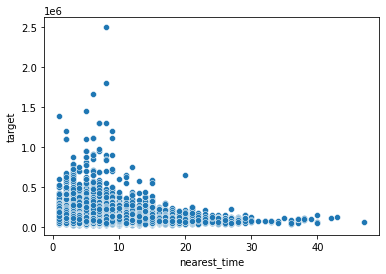

In [9]:
sns.scatterplot(data=train_df, x="nearest_time", y="target")